In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
titantic = pd.read_csv('./train.csv')

In [4]:
titantic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
len(titantic['PassengerId']) # Number of passengers on this dataset.

891

In [6]:
# note, Titantic had 1503 people, 1317 being passengers

In [7]:
titantic.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [8]:
titantic_null = titantic.isnull().sum()

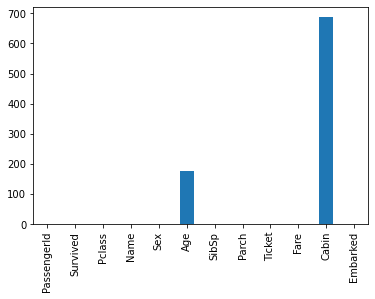

In [9]:
titantic_null.plot(kind='bar') 

In [10]:
titantic_null

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

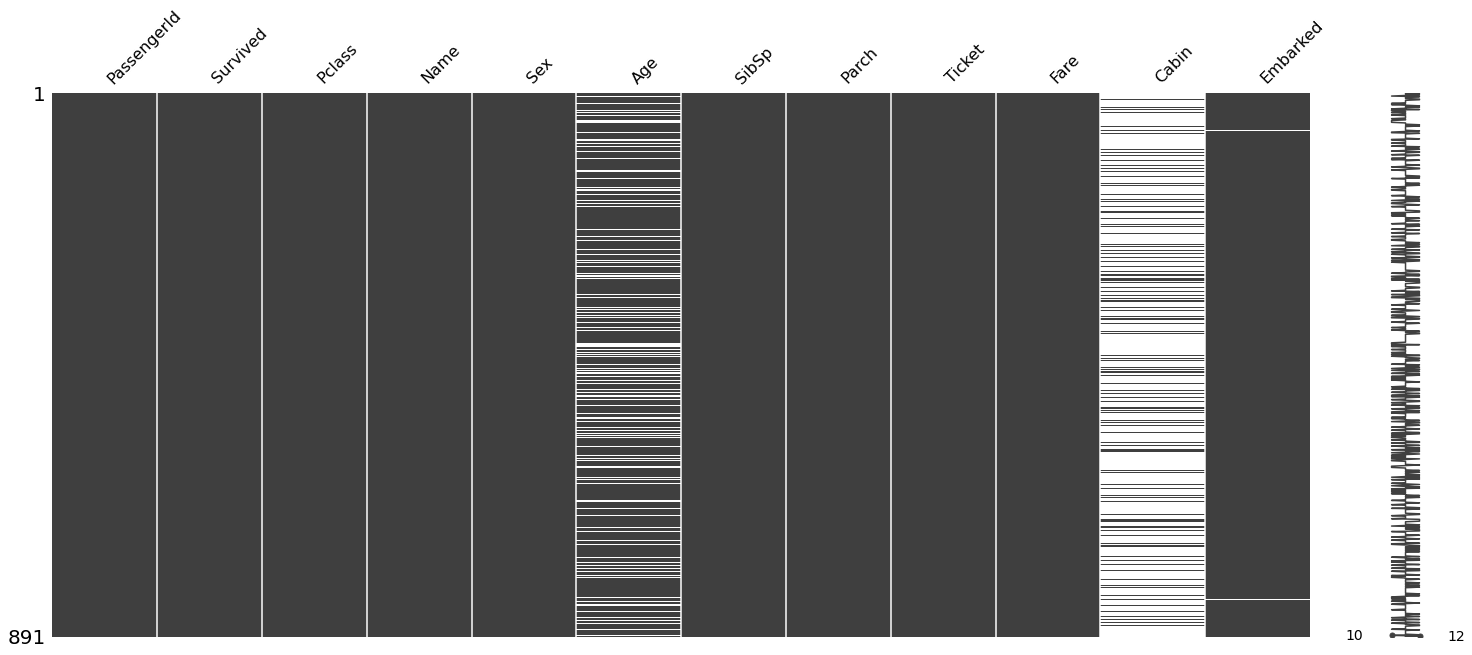

In [11]:
msno.matrix(titantic)

Cabin information is missing from most of the passengers with 687 NaN Cells
Second is Age at 177 NaN cells

In [12]:
titantic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
titantic = titantic.dropna(subset=['Embarked'])

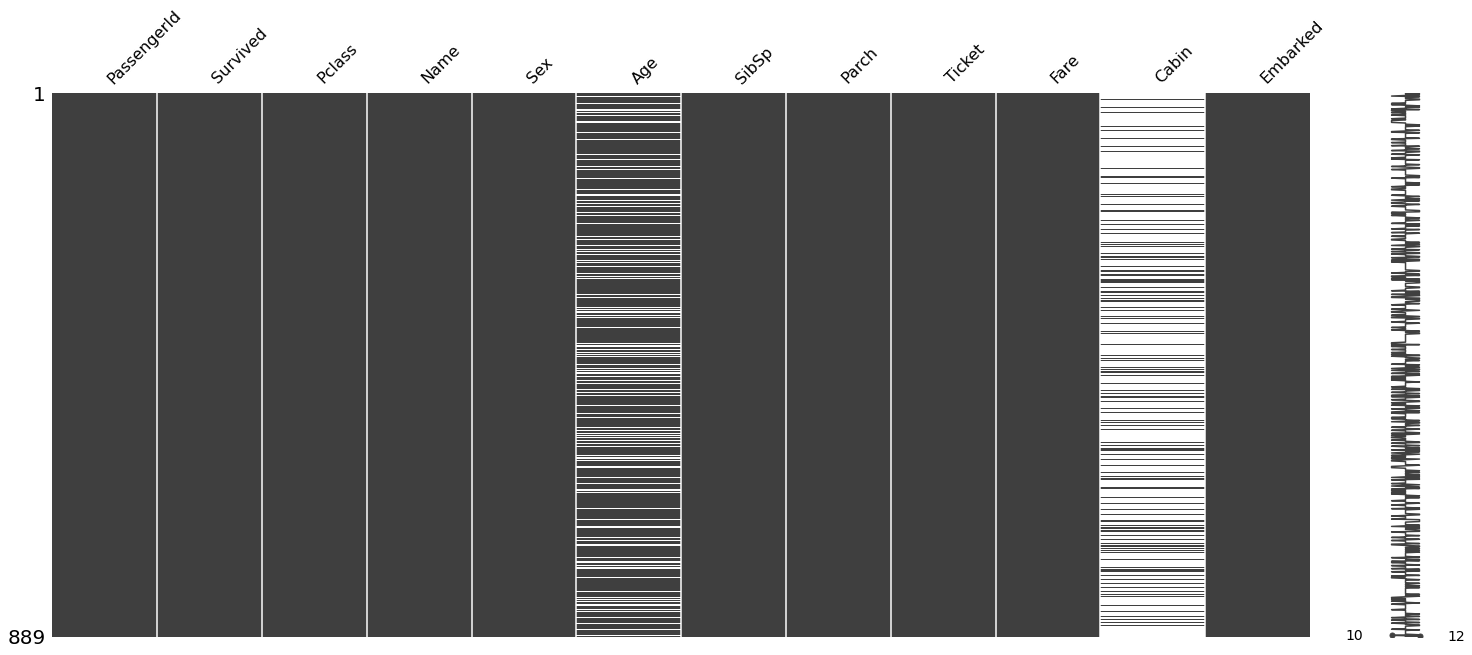

In [14]:
msno.matrix(titantic)

In [15]:
titantic['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 889, dtype: object

In [16]:
# Source https://stackoverflow.com/questions/26837998/pandas-replace-nan-with-blank-empty-string
titantic['Cabin'] = titantic['Cabin'].replace(np.nan, '¯\(ツ)/¯').copy()

<ipython-input-16-07c68f369c85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titantic['Cabin'] = titantic['Cabin'].replace(np.nan, '¯\(ツ)/¯').copy()


In [17]:
# Using a copy(), we save the old DataFrame
# Check w/ JoBeth for followup

In [18]:
# Ha, this is cute

In [19]:
titantic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\(ツ)/¯,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
titantic['SibSp'] + titantic['Parch']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 889, dtype: int64

In [21]:
titantic['FamilyCount'] = titantic['SibSp'] + titantic['Parch']

<ipython-input-21-01cd96921cc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titantic['FamilyCount'] = titantic['SibSp'] + titantic['Parch']


In [22]:
titantic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\(ツ)/¯,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [23]:
 #[True for i in titantic['Name'] if i in 'Rev.']

In [24]:
titantic['Name'].str.contains('Rev.').astype(int)

0      0
1      0
2      0
3      0
4      0
      ..
886    1
887    0
888    0
889    0
890    0
Name: Name, Length: 889, dtype: int64

In [25]:
titantic['IsReverend'] = titantic['Name'].str.contains('Rev.').astype(int)

<ipython-input-25-e2896fa53f95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titantic['IsReverend'] = titantic['Name'].str.contains('Rev.').astype(int)


In [26]:
titantic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\(ツ)/¯,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,S,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0


In [27]:
pd.get_dummies(titantic[['Embarked']])

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [28]:
pd.get_dummies(titantic[['Sex']])

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [29]:
pd.Series([i.split() for i in titantic['Name']]).value_counts()

[Hart,, Mrs., Benjamin, (Esther, Ada, Bloomfield)]     1
[Petroff,, Mr., Pastcho, ("Pentcho")]                  1
[Levy,, Mr., Rene, Jacques]                            1
[Ling,, Mr., Lee]                                      1
[Slayter,, Miss., Hilda, Mary]                         1
                                                      ..
[Downton,, Mr., William, James]                        1
[Dick,, Mrs., Albert, Adrian, (Vera, Gillespie)]       1
[Lurette,, Miss., Elise]                               1
[Graham,, Mr., George, Edward]                         1
[Shelley,, Mrs., William, (Imanita, Parrish, Hall)]    1
Length: 889, dtype: int64

In [30]:
[i.split() for i in titantic['Name']]

[['Braund,', 'Mr.', 'Owen', 'Harris'],
 ['Cumings,', 'Mrs.', 'John', 'Bradley', '(Florence', 'Briggs', 'Thayer)'],
 ['Heikkinen,', 'Miss.', 'Laina'],
 ['Futrelle,', 'Mrs.', 'Jacques', 'Heath', '(Lily', 'May', 'Peel)'],
 ['Allen,', 'Mr.', 'William', 'Henry'],
 ['Moran,', 'Mr.', 'James'],
 ['McCarthy,', 'Mr.', 'Timothy', 'J'],
 ['Palsson,', 'Master.', 'Gosta', 'Leonard'],
 ['Johnson,', 'Mrs.', 'Oscar', 'W', '(Elisabeth', 'Vilhelmina', 'Berg)'],
 ['Nasser,', 'Mrs.', 'Nicholas', '(Adele', 'Achem)'],
 ['Sandstrom,', 'Miss.', 'Marguerite', 'Rut'],
 ['Bonnell,', 'Miss.', 'Elizabeth'],
 ['Saundercock,', 'Mr.', 'William', 'Henry'],
 ['Andersson,', 'Mr.', 'Anders', 'Johan'],
 ['Vestrom,', 'Miss.', 'Hulda', 'Amanda', 'Adolfina'],
 ['Hewlett,', 'Mrs.', '(Mary', 'D', 'Kingcome)'],
 ['Rice,', 'Master.', 'Eugene'],
 ['Williams,', 'Mr.', 'Charles', 'Eugene'],
 ['Vander', 'Planke,', 'Mrs.', 'Julius', '(Emelia', 'Maria', 'Vandemoortele)'],
 ['Masselmani,', 'Mrs.', 'Fatima'],
 ['Fynney,', 'Mr.', 'Joseph'

In [31]:
titles = ['Mr.', 'Miss.', 'Mrs.', 'Master.', 'Dr.', 'Rev.', 'Major.', 'Mlle.', 'Col.', 'Jonkheer.', 'Ms.', 'Don.', 'Mme.', 'Capt.']

## Exploratory Analysis

In [32]:
titantic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0


#### 1, What was the overall survival rate?

In [33]:
titantic['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [34]:
f'Overall Survival Rate was {round(340/(340+549) * 100,2)} %'

'Overall Survival Rate was 38.25 %'

#### 2, Which Gender fared the worst, their survival rate?

In [35]:
titantic.groupby(by='Sex')[['Sex', 'Survived']].describe()

Survived                                             
          count      mean       std  min  25%  50%  75%  max
Sex                                                         
female    312.0  0.740385  0.439128  0.0  0.0  1.0  1.0  1.0
male      577.0  0.188908  0.391775  0.0  0.0  0.0  0.0  1.0

In [36]:
titantic.groupby(by='Sex')[['Sex', 'Survived']].sum()

,Survived
Sex,
female,231
male,109


In [37]:
f'Male Survival Rate was {round(109/(577) * 100,2)} %'

'Male Survival Rate was 18.89 %'

In [38]:
f'Female Survival rate was {round(231/(312) * 100,2)} %'

'Female Survival rate was 74.04 %'

In [39]:
f' Men fared the worst with a {100-18.89} % casualty rate'

' Men fared the worst with a 81.11 % casualty rate'

#### 3, Survival rate per Pclass?

In [40]:
titantic.groupby(by='Pclass')[['Pclass', 'Survived']].sum()

,Pclass,Survived
Pclass,,
1,214,134
2,368,87
3,1473,119


In [41]:
f'First class had a {round(134/(214+134)*100,2)} % survival rate'

'First class had a 38.51 % survival rate'

In [42]:
f'Second class had a {round(87/(87+(368/2))*100,2)} % survival rate'

'Second class had a 32.1 % survival rate'

In [43]:
f'Third class had a {round(119/((1473/3)+119)*100,2)} % survival rate'

'Third class had a 19.51 % survival rate'

In [44]:
# note, by summing the total amount of passengers into 1st, 2nd or 3rd class, they are identified by an integer
# which means nothing for analysis, so in this case we are taking that meaningless sum
# then calculating the true number of passengers in that respective passenger class

#### 4, Did any reverends survive? How many?

In [45]:
list(titantic.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'FamilyCount',
 'IsReverend']

In [46]:
titantic.groupby(by='IsReverend')[['IsReverend','Survived']].sum()

,IsReverend,Survived
IsReverend,,
0,0,340
1,6,0


In [47]:
f'No Reverends survived the Titantic'

'No Reverends survived the Titantic'

#### 5, What is the Survival rate for cabins marked ¯\(ツ)/¯ ?

In [48]:
titantic.groupby(by='Cabin')[['Survived', 'Cabin']].describe()

Survived                                             
           count      mean       std  min  25%  50%  75%  max
Cabin                                                        
A10          1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0
A14          1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0
A16          1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0
A19          1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0
A20          1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0
...          ...       ...       ...  ...  ...  ...  ...  ...
F38          1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0
F4           2.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
G6           4.0  0.500000  0.577350  0.0  0.0  0.5  1.0  1.0
T            1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0
¯\(ツ)/¯    687.0  0.299854  0.458528  0.0  0.0  0.0  1.0  1.0

[147 rows x 8 columns]

In [49]:
titantic.groupby(by='Cabin')[['Survived', 'Cabin']].sum()

,Survived
Cabin,
A10,0
A14,0
A16,1
A19,0
A20,1
...,...
F38,0
F4,2
G6,2


In [50]:
f'Survival Rate for people in ¯(ツ)/¯ Cabins is {round(206/687 * 100,2)} %'

'Survival Rate for people in ¯(ツ)/¯ Cabins is 29.99 %'

#### 6, Survival rate for people whose age is NaN?

In [51]:
titantic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\(ツ)/¯,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,S,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0


In [52]:
titantic[['Age']].isnull()

,Age
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,True
889,False


In [53]:
titantic.iloc[5]

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                         NaN
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                   ¯\(ツ)/¯
Embarked                      Q
FamilyCount                   0
IsReverend                    0
Name: 5, dtype: object

#### 7, Survival Rate for each port of embarkation?

In [54]:
titantic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilyCount',
       'IsReverend'],
      dtype='object')

In [55]:
titantic.groupby(by='Embarked').describe()

PassengerId                                                      \
               count        mean         std  min     25%    50%     75%   
Embarked                                                                   
C              168.0  445.357143  259.454201  2.0  235.50  455.0  651.00   
Q               77.0  417.896104  253.646282  6.0  209.00  389.0  630.00   
S              644.0  449.527950  256.942044  1.0  225.75  447.5  673.25   

                Survived            ... FamilyCount       IsReverend  \
            max    count      mean  ...         75%   max      count   
Embarked                            ...                                
C         890.0    168.0  0.553571  ...         1.0   4.0      168.0   
Q         891.0     77.0  0.389610  ...         1.0   5.0       77.0   
S         889.0    644.0  0.336957  ...         1.0  10.0      644.0   

                                                       
              mean       std  min  25%  50%  75%  max  
Embarked                                               
C         0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
Q         0.012987  0.113961  0.0  0.0  0.0  0.0  1.0  
S         0.007764  0.087839  0.0  0.0  0.0  0.0  1.0  

[3 rows x 72 columns]

In [56]:
titantic.groupby(by='Embarked')[['Survived', 'Embarked']].sum()

,Survived
Embarked,
C,93
Q,30
S,217


In [57]:
f'C had a survival rate of {round(93/168*100, 2)}%', f'Q had a survival rate of {round(30/77*100, 2)}%', f'S had a survival rate of {round(217/644*100, 2)}%'

('C had a survival rate of 55.36%',
 'Q had a survival rate of 38.96%',
 'S had a survival rate of 33.7%')

#### 8, What is the survival rate for children under 12 in each Pclass?

In [58]:
titantic[titantic['Age'] < 12]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,¯\(ツ)/¯,S,4,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S,2,0
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,¯\(ツ)/¯,Q,5,0
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,¯\(ツ)/¯,S,4,0
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,¯\(ツ)/¯,C,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,¯\(ツ)/¯,C,2,0
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,¯\(ツ)/¯,S,2,0
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,4,2,347082,31.2750,¯\(ツ)/¯,S,6,0
852,853,0,3,"Boulos, Miss. Nourelain",female,9.00,1,1,2678,15.2458,¯\(ツ)/¯,C,2,0


In [59]:
# Fixing Age for ages under 1

In [63]:
titantic[titantic['Age'] < 1]['Age']

78     0.83
305    0.92
469    0.75
644    0.75
755    0.67
803    0.42
831    0.83
Name: Age, dtype: float64

In [64]:
titantic[titantic['Age'] < 1]['Age'] = titantic[titantic['Age'] < 1]['Age'] * 100

<ipython-input-64-9b50da5b9f08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titantic[titantic['Age'] < 1]['Age'] = titantic[titantic['Age'] < 1]['Age'] * 100


In [65]:
titantic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0


In [66]:
titantic[titantic['Age'] < 12].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilyCount,IsReverend
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.0
mean,436.941176,0.573529,2.632353,4.664265,1.882353,1.426471,31.834803,3.308824,0.0
std,278.794788,0.498241,0.596117,3.297692,1.643889,0.554928,26.504422,1.838700,0.0
min,8.000000,0.000000,1.000000,0.420000,0.000000,0.000000,8.516700,0.000000,0.0
25%,183.750000,0.000000,2.000000,2.000000,0.750000,1.000000,19.140600,2.000000,0.0
50%,433.000000,1.000000,3.000000,4.000000,1.000000,1.000000,27.825000,3.000000,0.0
75%,723.750000,1.000000,3.000000,8.000000,4.000000,2.000000,31.790625,5.000000,0.0
max,870.000000,1.000000,3.000000,11.000000,5.000000,2.000000,151.550000,7.000000,0.0


In [67]:
titantic[titantic['Age'] < 12][['Survived','Pclass']].groupby(by='Pclass').describe()

Survived                                              
          count      mean       std  min   25%  50%  75%  max
Pclass                                                       
1           4.0  0.750000  0.500000  0.0  0.75  1.0  1.0  1.0
2          17.0  1.000000  0.000000  1.0  1.00  1.0  1.0  1.0
3          47.0  0.404255  0.496053  0.0  0.00  0.0  1.0  1.0

In [68]:
titantic[titantic['Age'] < 12][['Survived','Pclass']].groupby(by='Pclass').sum()

,Survived
Pclass,
1,3
2,17
3,19


In [69]:
[f'First Class Children: {round(2/3*100,2)}% Survival',
f'Second Class Children: {round(14/14*100,2)}% Survival',
f'Third Class Children: {round(16/44*100,2)}% Survival']

['First Class Children: 66.67% Survival',
 'Second Class Children: 100.0% Survival',
 'Third Class Children: 36.36% Survival']

#### 9, Did the captain survive? Is he on the list?

In [70]:
titantic['Name'].str.contains('Capt.').sum()

1

In [71]:
# The captain is on the list

In [72]:
titantic[titantic['Name'].str.contains('Capt.')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,2,0


In [73]:
f'The Captain is included on the list; he did not survive'

'The Captain is included on the list; he did not survive'

#### 10, Of all the people who died, who had the most expensive ticket? How much did it cost?

In [74]:
titantic.loc[:, ['Name', 'Fare']].sort_values(by='Fare', ascending=True)

,Name,Fare
271,"Tornquist, Mr. William Henry",0.0000
597,"Johnson, Mr. Alfred",0.0000
302,"Johnson, Mr. William Cahoone Jr",0.0000
633,"Parr, Mr. William Henry Marsh",0.0000
277,"Parkes, Mr. Francis ""Frank""",0.0000
...,...,...
341,"Fortune, Miss. Alice Elizabeth",263.0000
88,"Fortune, Miss. Mabel Helen",263.0000
737,"Lesurer, Mr. Gustave J",512.3292
679,"Cardeza, Mr. Thomas Drake Martinez",512.3292


In [80]:
titantic = titantic.reset_index(drop=True)

In [81]:
titantic.loc[:, ['Name', 'Fare']].sort_values(by='Fare', ascending=True)

,Name,Fare
270,"Tornquist, Mr. William Henry",0.0000
596,"Johnson, Mr. Alfred",0.0000
301,"Johnson, Mr. William Cahoone Jr",0.0000
632,"Parr, Mr. William Henry Marsh",0.0000
276,"Parkes, Mr. Francis ""Frank""",0.0000
...,...,...
340,"Fortune, Miss. Alice Elizabeth",263.0000
87,"Fortune, Miss. Mabel Helen",263.0000
736,"Lesurer, Mr. Gustave J",512.3292
678,"Cardeza, Mr. Thomas Drake Martinez",512.3292


In [82]:
titantic.iloc[257]

PassengerId                 259
Survived                      1
Pclass                        1
Name           Ward, Miss. Anna
Sex                      female
Age                          35
SibSp                         0
Parch                         0
Ticket                 PC 17755
Fare                    512.329
Cabin                   ¯\(ツ)/¯
Embarked                      C
FamilyCount                   0
IsReverend                    0
Name: 257, dtype: object

In [83]:
f'Ward, Miss. Anna had the most expensive ticket at {512.239} British Pound Sterling'

'Ward, Miss. Anna had the most expensive ticket at 512.239 British Pound Sterling'

#### 11, Does having family on the boat help or hurt your chance of survival?

In [84]:
titantic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0


In [86]:
titantic['FamilyCount'] = titantic['FamilyCount'] + 1

In [87]:
# This was done to account for total family and not relative family

In [93]:
titantic[titantic['FamilyCount'] > 1]['Survived'].describe()

count    354.000000
mean       0.505650
std        0.500676
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [92]:
titantic[titantic['FamilyCount'] > 1]['Survived'].sum()

179

In [96]:
titantic[titantic['FamilyCount'] == 1]['Survived'].describe()

count    535.000000
mean       0.300935
std        0.459094
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [97]:
titantic[titantic['FamilyCount'] == 1]['Survived'].sum()

161

In [98]:
[f'Those with family had a {round(179/354*100, 2)}% survival rate',
f'Those without family had a {round(161/535*100,2)} survival rate'
]

['Those with family had a 50.56% survival rate',
 'Those without family had a 30.09 survival rate']

In [99]:
# Yes, those who had families most likely survived

# This can be due to the focus on Women and Children first, and men were left behind


### Fun Plotting Time showing survival rate of different groups of people

In [103]:
import seaborn as sns

In [101]:
titantic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\(ツ)/¯,S,1,1
885,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,S,4,0
887,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0


In [102]:
# First the basic ones

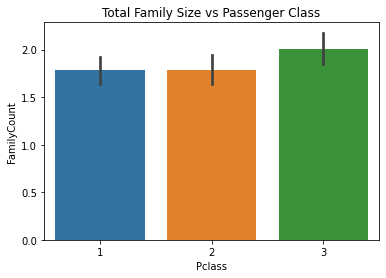

In [107]:
plt.title('Total Family Size vs Passenger Class')
sns.barplot(titantic['Pclass'], titantic['FamilyCount'])

In [129]:
# Looking at this plot, on average most of the people traveled alone or as a couple

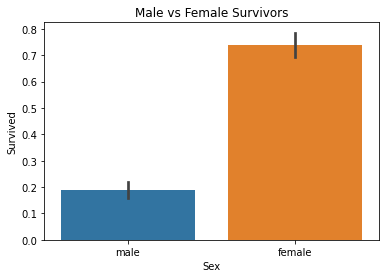

In [109]:
plt.title('Male vs Female Survivors')
sns.barplot(titantic['Sex'], titantic['Survived'])

In [130]:
# Women and Children First

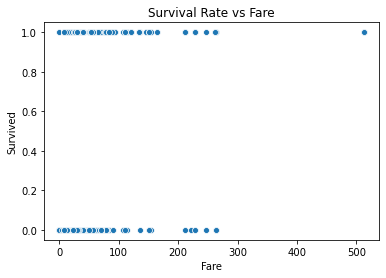

In [113]:
plt.title('Survival Rate vs Fare')
sns.scatterplot(titantic['Fare'], titantic['Survived'])

In [114]:
# This one is kind of weird, being surviving or not is a boolean, and on a scatterplot it looks kind of weird, but it's
# kind of cool to see that relationship with fare amount

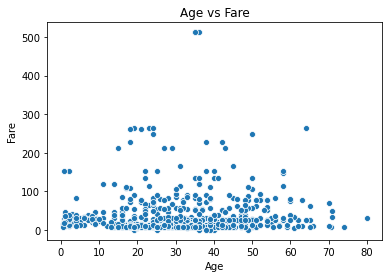

In [117]:
plt.title('Age vs Fare')
sns.scatterplot(titantic['Age'], titantic['Fare'],)

In [118]:
# Those in their 30s must have been REALLY rich with tickets above 500

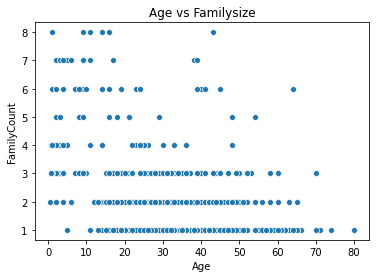

In [127]:
plt.title('Age vs Familysize')
plt.xlabel('Age')
plt.ylabel('Family Size')
sns.scatterplot(titantic['Age'], titantic['FamilyCount'])

In [132]:
# Those with the largest families tended to be youngest, most likely many children. That doesn't make the earlier 
# calculation for children survival rate any better

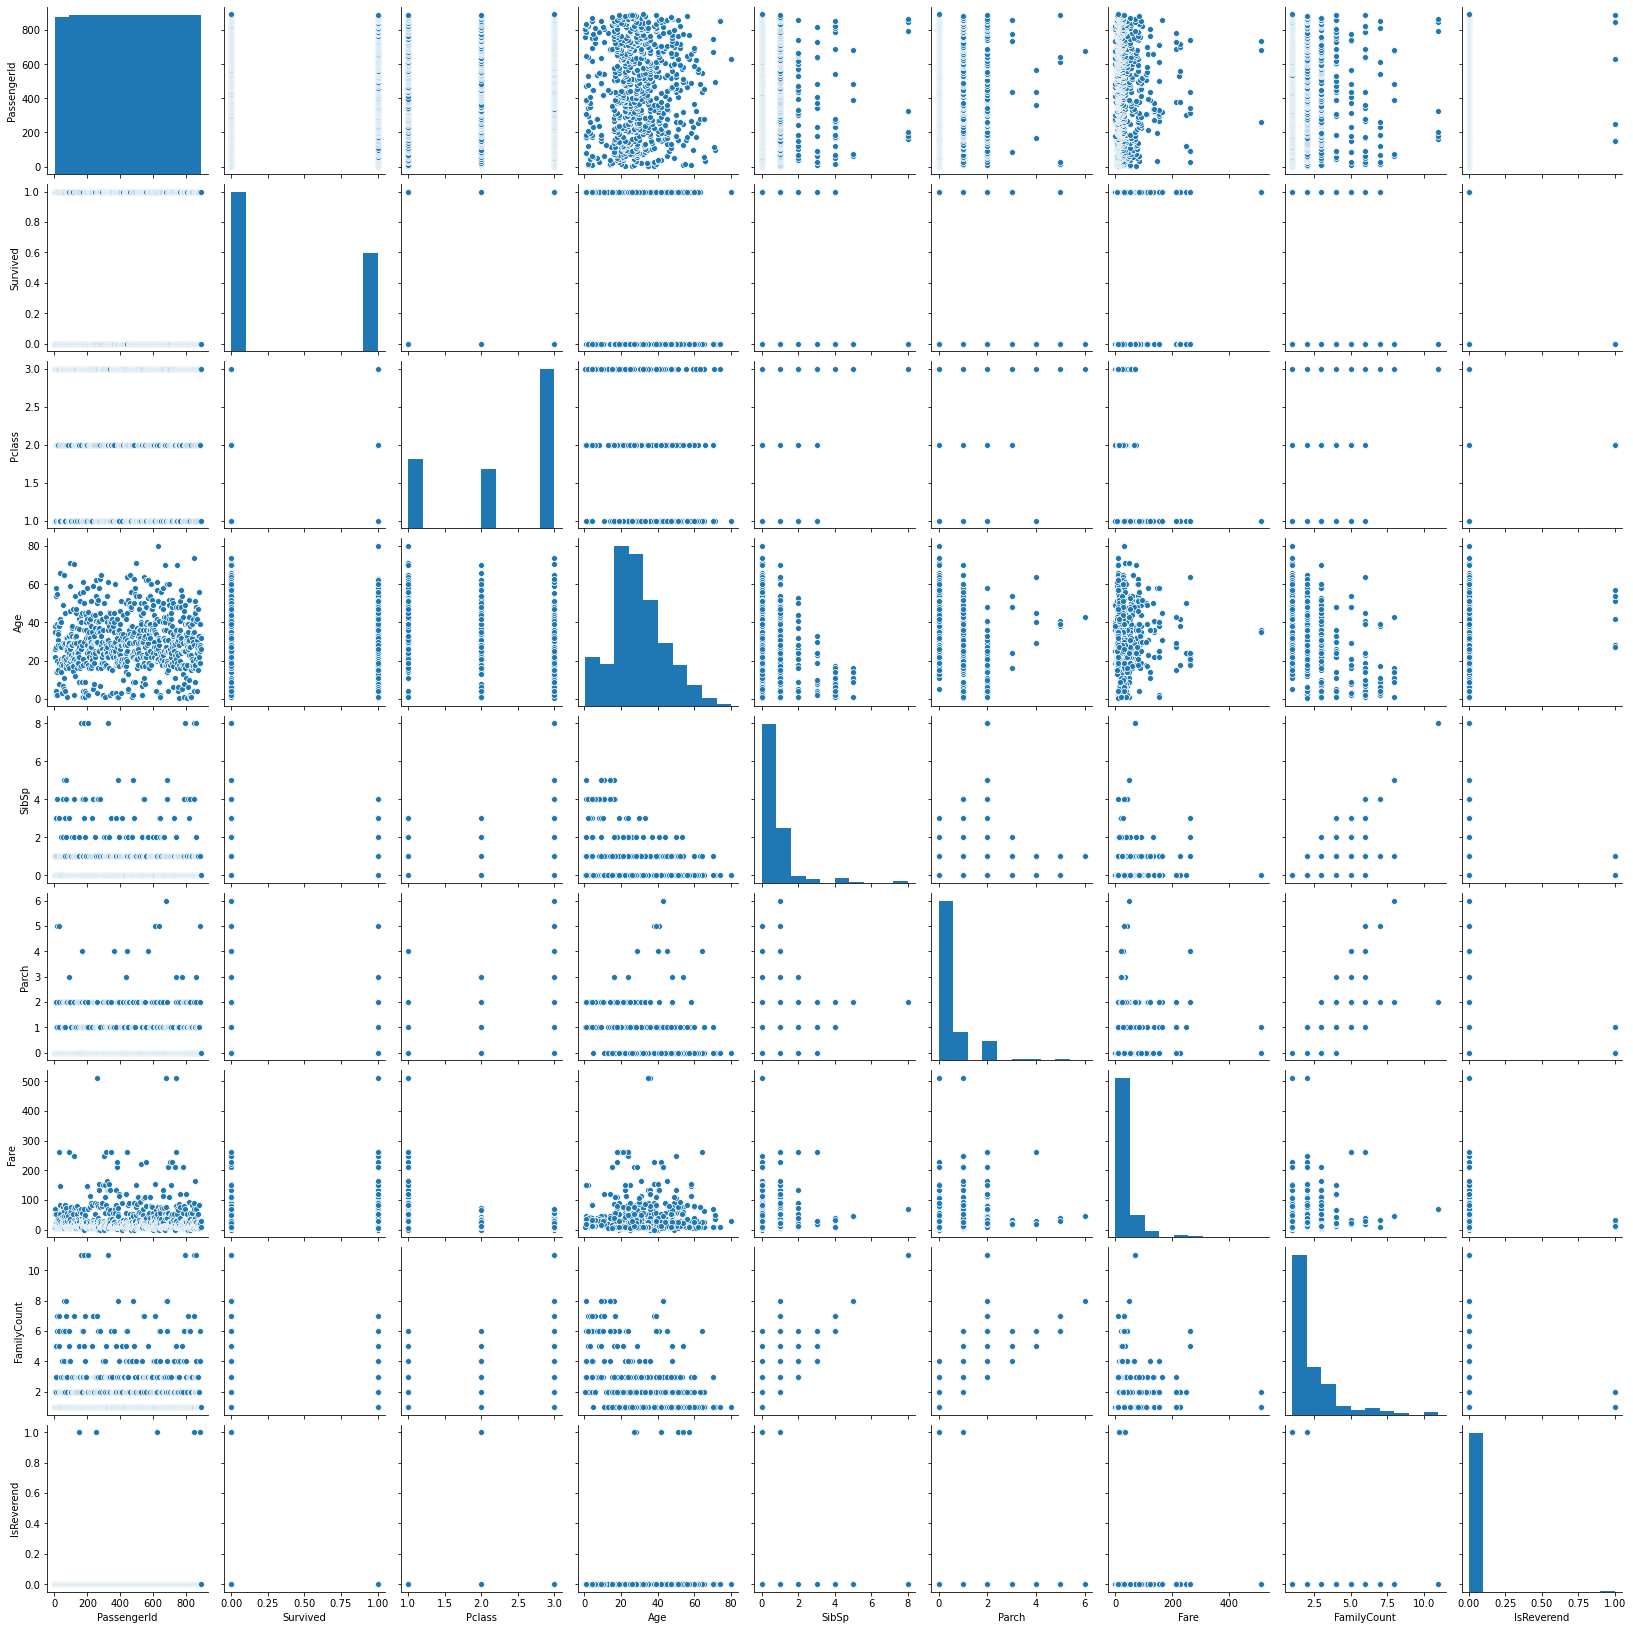

In [133]:
sns.pairplot(titantic)

In [134]:
# A quick glance at this pairplot and unfortunetly, I don't see anything too interesting